# Laden der Daten und Inspizieren der Daten (kopiert)

In [32]:
notebook_title = "unet_data_augmented_8_transformations"

In [15]:
%run ./utils/load_data.ipynb

No of images:  290
No of masks:  290


(290, 224, 224, 3)
Loaded 290 images and masks.


# Data augmentation


In [88]:
# import import_ipynb
# from utils.data_augmentation import augment

# augmented_images, augmented_masks = augment(images, masks)

%run ./utils/data_augmentation.ipynb

print("Dataset size before augmentation: ", images.shape[0])
print("Dataset size after augmentation:", augmented_images.shape[0])


<class 'numpy.ndarray'>
[[[0.20784314 0.27843137 0.28235294]
  [0.20784314 0.2745098  0.20784314]
  [0.19215686 0.21960784 0.2627451 ]
  ...
  [0.14509804 0.20784314 0.14117647]
  [0.14117647 0.20784314 0.20392157]
  [0.05098039 0.09019608 0.08235294]]

 [[0.22745098 0.32941176 0.37254902]
  [0.20784314 0.27843137 0.28235294]
  [0.14117647 0.20784314 0.20392157]
  ...
  [0.14117647 0.20784314 0.20392157]
  [0.14117647 0.20784314 0.20392157]
  [0.08627451 0.15294118 0.14509804]]

 [[0.15686275 0.25882353 0.21960784]
  [0.19215686 0.21960784 0.2627451 ]
  [0.14117647 0.20784314 0.20392157]
  ...
  [0.14117647 0.20784314 0.20392157]
  [0.20784314 0.21568627 0.20784314]
  [0.14509804 0.20784314 0.14117647]]

 ...

 [[0.08235294 0.14117647 0.07058824]
  [0.08235294 0.14117647 0.07058824]
  [0.05098039 0.09019608 0.08235294]
  ...
  [0.79215686 0.78823529 0.65098039]
  [0.79215686 0.78823529 0.65098039]
  [0.79215686 0.78823529 0.65098039]]

 [[0.1372549  0.14901961 0.13333333]
  [0.08235294

/tmp/ipykernel_2705058/3033432171.py:27: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  elastic_transform = A.ElasticTransform(p=1.0, alpha=120, sigma=120, alpha_affine=120)(image=img, mask=msk)


<class 'numpy.ndarray'>
[[[0.41960784 0.44705882 0.43921569]
  [0.41960784 0.44705882 0.43921569]
  [0.41960784 0.44705882 0.43921569]
  ...
  [0.88627451 0.9254902  0.91372549]
  [0.88627451 0.9254902  0.91372549]
  [0.89019608 0.9254902  0.91372549]]

 [[0.41960784 0.44705882 0.43921569]
  [0.41960784 0.44705882 0.43921569]
  [0.41960784 0.44705882 0.43921569]
  ...
  [0.88627451 0.9254902  0.91372549]
  [0.88627451 0.9254902  0.91372549]
  [0.89019608 0.9254902  0.91372549]]

 [[0.41568627 0.44705882 0.43921569]
  [0.41960784 0.44705882 0.43921569]
  [0.41960784 0.44705882 0.43921569]
  ...
  [0.88627451 0.9254902  0.91372549]
  [0.88627451 0.9254902  0.91372549]
  [0.89411765 0.92156863 0.91372549]]

 ...

 [[0.47058824 0.3372549  0.28235294]
  [0.47058824 0.3372549  0.28235294]
  [0.4745098  0.34117647 0.28627451]
  ...
  [0.56862745 0.65098039 0.63529412]
  [0.56862745 0.65098039 0.63529412]
  [0.56078431 0.64313725 0.62352941]]

 [[0.47058824 0.33333333 0.28235294]
  [0.47058824

KeyboardInterrupt: 

KeyboardInterrupt: 

# Beispiele aufzeigen

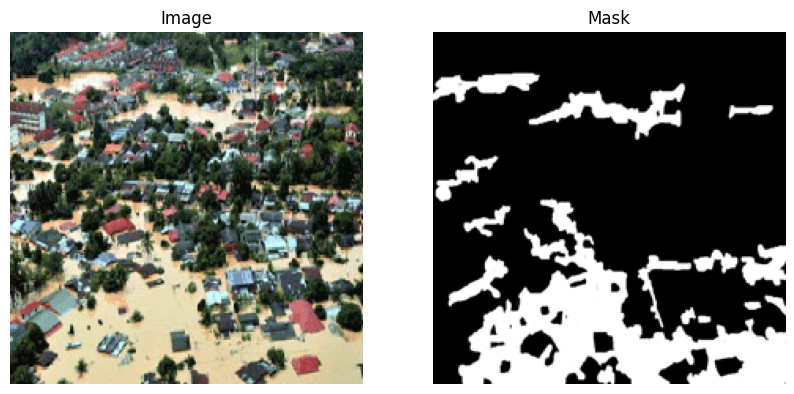

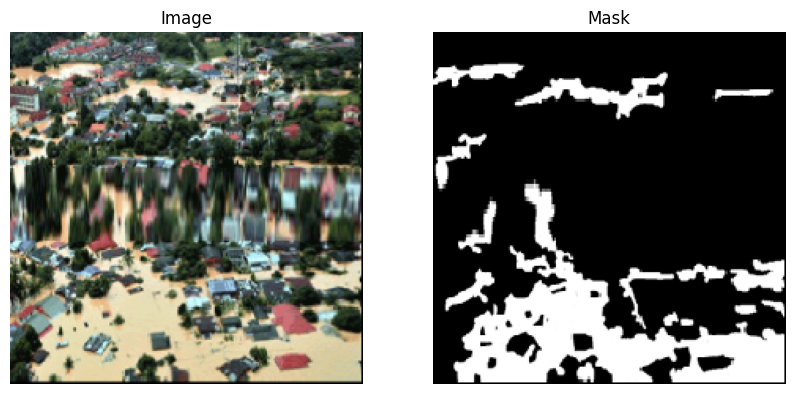

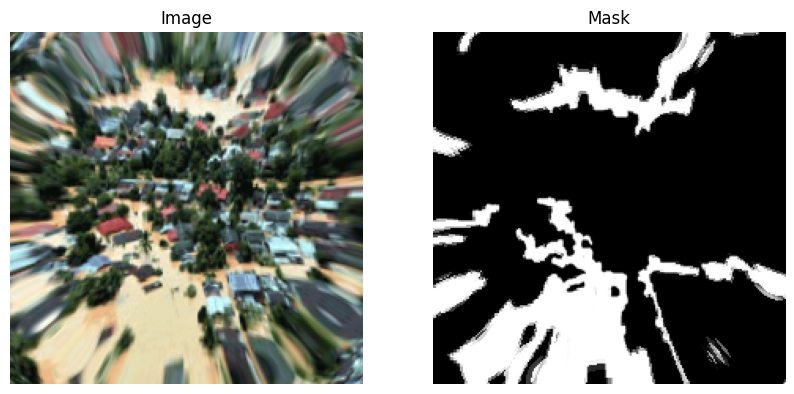

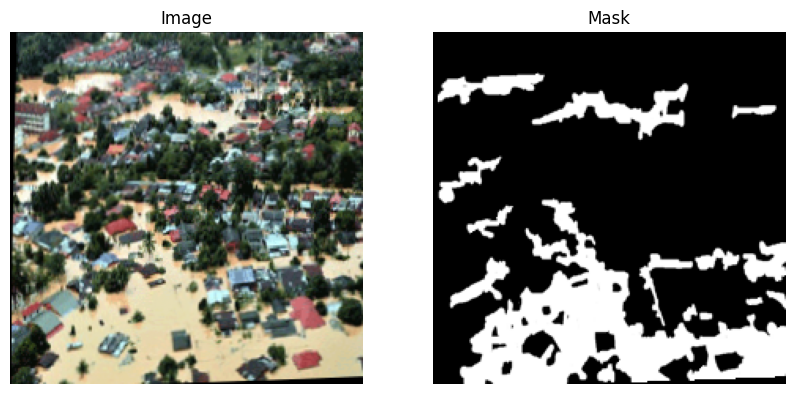

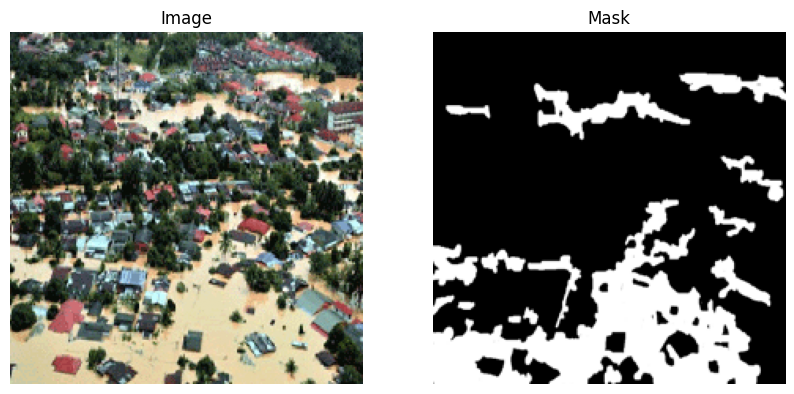

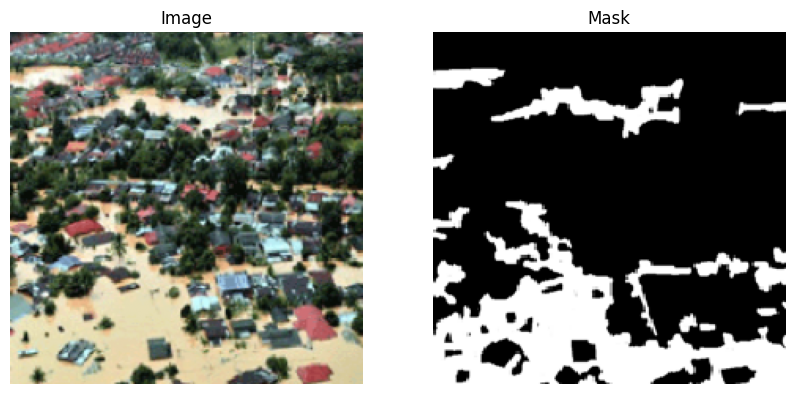

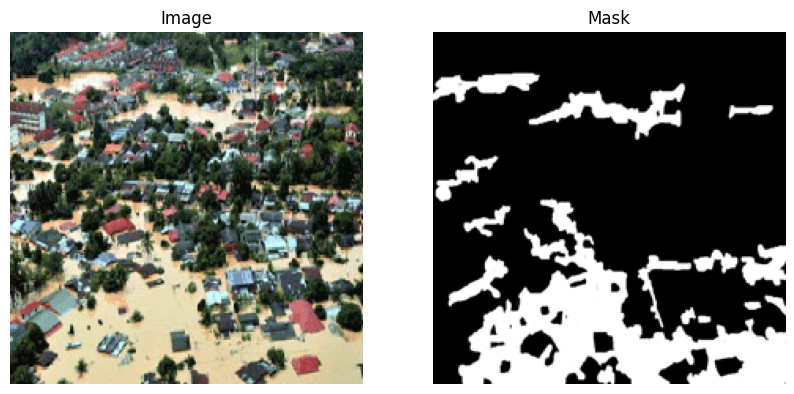

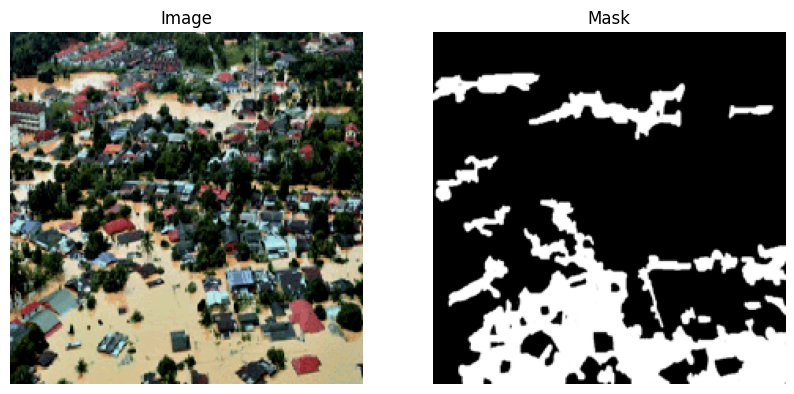

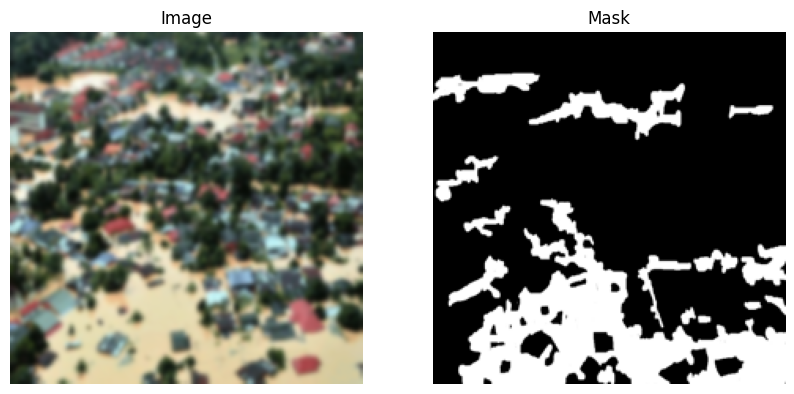

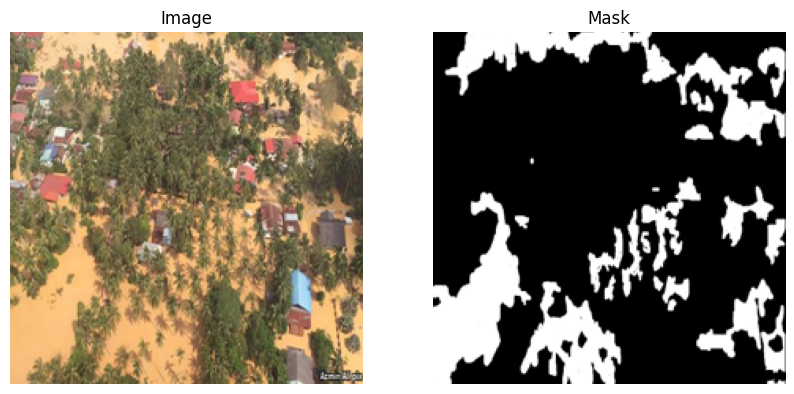

In [79]:
import matplotlib.pyplot as plt

for img, mask in zip(augmented_images[:10], augmented_masks[:10]):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title(f"Image")
  plt.imshow(img)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title(f"Mask")
  plt.imshow(mask, cmap='gray')
  plt.axis('off')

70% Training
15% Validierung
15% Test

In [58]:
# Train-validation-test split
from sklearn.model_selection import train_test_split

# First split: training set and temporary set (30% goes to temp)
X_train, X_temp, y_train, y_temp = train_test_split(augmented_images, augmented_masks, test_size=0.3, random_state=42)

# Second split: divide temp set into validation and test sets (50% each → 15% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes
print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)

Train: (1827, 224, 224, 3)
Val:   (391, 224, 224, 3)
Test:  (392, 224, 224, 3)


#### Tensorflow Speicherwachstum erlauben - verhindert Pre-Allocation

In [27]:
# limit the usage of GPU memory

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2025-06-17 13:56:22.371627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750168582.387397 2705058 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750168582.392256 2705058 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750168582.404516 2705058 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750168582.404527 2705058 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750168582.404529 2705058 computation_placer.cc:177] computation placer alr

# Model

In [60]:
import import_ipynb
from utils.iou import iou_metric
from utils.precision_recall_f1 import precision_metric, recall_metric, f1_metric
# from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

from utils.u_net_v1 import unet_model

model = unet_model((IMG_HEIGHT, IMG_WIDTH, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', iou_metric, precision_metric, recall_metric, f1_metric])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 224, 224,  │        448 │ input_layer_3[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 224, 224,  │      2,320 │ conv2d_45[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 112, 112,  │          0 │ conv2d_46[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 112, 112,  │      4,640 │ max_pooling2d_9[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 112, 112,  │      9,248 │ conv2d_47[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 56, 56,    │          0 │ conv2d_48[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 56, 56,    │     18,496 │ max_pooling2d_10… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 56, 56,    │     36,928 │ conv2d_49[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 28, 28,    │          0 │ conv2d_50[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_51 (Conv2D)  │ (None, 28, 28,    │     73,856 │ max_pooling2d_11… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_52 (Conv2D)  │ (None, 28, 28,    │    147,584 │ conv2d_51[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_9     │ (None, 56, 56,    │          0 │ conv2d_52[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 56, 56,    │          0 │ up_sampling2d_9[… │
│ (Concatenate)       │ 192)              │            │ conv2d_50[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_53 (Conv2D)  │ (None, 56, 56,    │    110,656 │ concatenate_9[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_54 (Conv2D)  │ (None, 56, 56,    │     36,928 │ conv2d_53[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_10    │ (None, 112, 112,  │          0 │ conv2d_54[0][0] 

 Total params: 487,297 (1.86 MB)

 Trainable params: 487,297 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
BATCH_SIZE = 32

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=BATCH_SIZE
)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.6317 - f1_metric: 0.2561 - iou_metric: 0.1933 - loss: 0.6110 - precision_metric: 0.3943 - recall_metric: 0.2385 - val_accuracy: 0.7625 - val_f1_metric: 0.7493 - val_iou_metric: 0.5999 - val_loss: 0.4519 - val_precision_metric: 0.7221 - val_recall_metric: 0.7808
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7619 - f1_metric: 0.7284 - iou_metric: 0.5742 - loss: 0.4609 - precision_metric: 0.7659 - recall_metric: 0.7086 - val_accuracy: 0.7998 - val_f1_metric: 0.7766 - val_iou_metric: 0.6354 - val_loss: 0.3976 - val_precision_metric: 0.8099 - val_recall_metric: 0.7478
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7961 - f1_metric: 0.7693 - iou_metric: 0.6269 - loss: 0.4106 - precision_metric: 0.8160 - recall_metric: 0.7382 - val_accuracy: 0.8101 - val_f1_metric: 0.7997 - val_iou_metric: 0.6668 - val_loss: 0.3768 - val_precision_metric: 0.7823 - val_recall_metric: 0.8194
Epoch 4/50
58/58 

Die Werte der Metrik "Intersection over Union (IoU)" hat sich deutlich verbessert (0.7154 -> ~0.8) auf dem Validation Set.


# 4 Transformationen - Nach 50 Epochen
- Endergebnisse nach 4 Versuchen
- originales U-Net
- Data augmented mit 4 Transformationen
  - flipping
  - cropping
  - rotation
  - brightness adjustment

## 2025-06-15
accuracy: 0.8951 - f1_metric: 0.9077 - iou_metric: 0.8313 - loss: 0.1891 - precision_metric: 0.9170 - recall_metric: 0.8990 - val_accuracy: 0.8825 - val_f1_metric: 0.8859 - val_iou_metric: 0.7957 - val_loss: 0.2347 - val_precision_metric: 0.8882 - val_recall_metric: 0.8843

## 2025-06-15
accuracy: 0.8926 - f1_metric: 0.9058 - iou_metric: 0.8281 - loss: 0.1927 - precision_metric: 0.9182 - recall_metric: 0.8940 - val_accuracy: 0.8856 - val_f1_metric: 0.8897 - val_iou_metric: 0.8016 - val_loss: 0.2339 - val_precision_metric: 0.8986 - val_recall_metric: 0.8814

## 2025-06-15
accuracy: 0.8927 - f1_metric: 0.9025 - iou_metric: 0.8226 - loss: 0.1925 - precision_metric: 0.9157 - recall_metric: 0.8903 - val_accuracy: 0.8838 - val_f1_metric: 0.8898 - val_iou_metric: 0.8021 - val_loss: 0.2347 - val_precision_metric: 0.8922 - val_recall_metric: 0.8876

## 2025-06-15
accuracy: 0.9012 - f1_metric: 0.9148 - iou_metric: 0.8432 - loss: 0.1705 - precision_metric: 0.9236 - recall_metric: 0.9067 - val_accuracy: 0.8870 - val_f1_metric: 0.8927 - val_iou_metric: 0.8067 - val_loss: 0.2303 - val_precision_metric: 0.9044 - val_recall_metric: 0.8816


# 8 Transformationen - Nach 50 Epochen
- Endergebnisse nach 3 Versuchen
- originales U-Net
- Data augmented mit 8 Transformationen
  - flipping
  - cropping
  - rotation
  - brightness adjustment
  - grid distortion
  - optical distortion
  - elastic transform
  - gaussian blur

## 2025-06-17
accuracy: 0.9199 - f1_metric: 0.9391 - iou_metric: 0.8853 - loss: 0.1212 - precision_metric: 0.9416 - recall_metric: 0.9373 - val_accuracy: 0.8987 - val_f1_metric: 0.9061 - val_iou_metric: 0.8285 - val_loss: 0.2170 - val_precision_metric: 0.9087 - val_recall_metric: 0.9036

## 2025-06-17
accuracy: 0.9215 - f1_metric: 0.9378 - iou_metric: 0.8829 - loss: 0.1201 - precision_metric: 0.9413 - recall_metric: 0.9344 - val_accuracy: 0.8944 - val_f1_metric: 0.8973 - val_iou_metric: 0.8139 - val_loss: 0.2210 - val_precision_metric: 0.9284 - val_recall_metric: 0.8683

## 2025-06-17
accuracy: 0.9219 - f1_metric: 0.9387 - iou_metric: 0.8846 - loss: 0.1176 - precision_metric: 0.9417 - recall_metric: 0.9359 - val_accuracy: 0.8939 - val_f1_metric: 0.9009 - val_iou_metric: 0.8198 - val_loss: 0.2181 - val_precision_metric: 0.9073 - val_recall_metric: 0.8947


## Model speichern

In [62]:
model.save(f'./trained_models/{notebook_title}_batch_size_{BATCH_SIZE}.keras')

# accuracy: 0.9012 - f1_metric: 0.9114 - iou_metric: 0.8375 - loss: 0.1743 - precision_metric: 0.9253 - recall_metric: 0.8985 - val_accuracy: 0.8722 - val_f1_metric: 0.8779 - val_iou_metric: 0.7827 - val_loss: 0.2546 - val_precision_metric: 0.8742 - val_recall_metric: 0.8818

### Modell und Variablen löschen - Cleanup

In [53]:
# import gc
# import tensorflow as tf
# from keras import backend as K

# # Delete model explicitly
# del model
# K.clear_session()
# tf.keras.backend.clear_session()

# del X_train, X_val, y_train, y_val
# # garbage collection
# gc.collect()

# Diagramme

In [49]:
print(history.history.keys())

dict_keys(['accuracy', 'f1_metric', 'iou_metric', 'loss', 'precision_metric', 'recall_metric', 'val_accuracy', 'val_f1_metric', 'val_iou_metric', 'val_loss', 'val_precision_metric', 'val_recall_metric'])


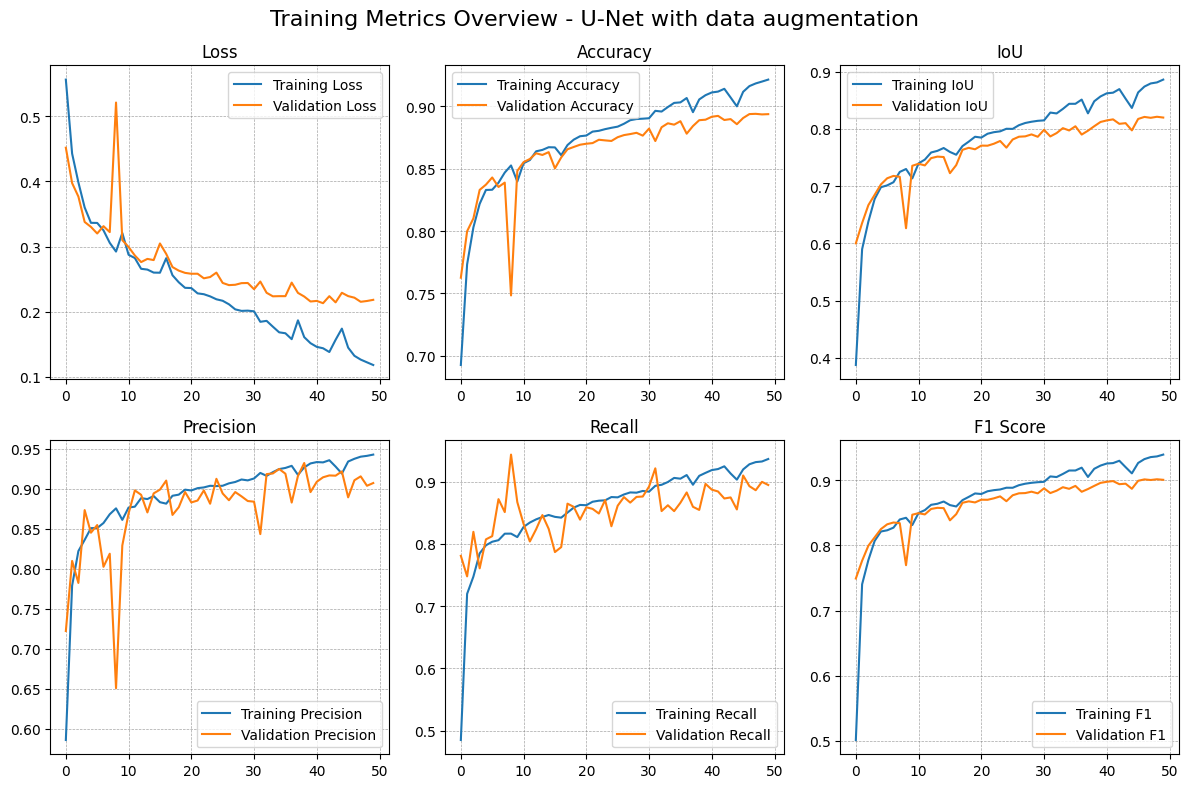

In [63]:
from datetime import datetime

# Plot training history
# Loss
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True, 
         linestyle='--',    # Dashed lines
         linewidth=0.5,     # Line width
         alpha=0.7,         # Transparency
         color='gray')      # Color
plt.title('Loss')

# Accuracy
plt.subplot(2, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True, 
         linestyle='--',    # Dashed lines
         linewidth=0.5,     # Line width
         alpha=0.7,         # Transparency
         color='gray')      # Color
plt.title('Accuracy')

#IoU
plt.subplot(2, 3, 3)
plt.plot(history.history['iou_metric'], label='Training IoU')
plt.plot(history.history['val_iou_metric'], label='Validation IoU')
plt.legend()
plt.grid(True, 
         linestyle='--',    # Dashed lines
         linewidth=0.5,     # Line width
         alpha=0.7,         # Transparency
         color='gray')      # Color
plt.title('IoU')

# Precision
plt.subplot(2, 3, 4)
plt.plot(history.history['precision_metric'], label='Training Precision')
plt.plot(history.history['val_precision_metric'], label='Validation Precision')
plt.title('Precision')
plt.legend()
plt.grid(True, 
         linestyle='--',    # Dashed lines
         linewidth=0.5,     # Line width
         alpha=0.7,         # Transparency
         color='gray')      # Color

# Recall
plt.subplot(2, 3, 5)
plt.plot(history.history['recall_metric'], label='Training Recall')
plt.plot(history.history['val_recall_metric'], label='Validation Recall')
plt.title('Recall')
plt.legend()
plt.grid(True, 
         linestyle='--',    # Dashed lines
         linewidth=0.5,     # Line width
         alpha=0.7,         # Transparency
         color='gray')      # Color

# F1 Score
plt.subplot(2, 3, 6)
plt.plot(history.history['f1_metric'], label='Training F1')
plt.plot(history.history['val_f1_metric'], label='Validation F1')
plt.title('F1 Score')
plt.legend()
plt.grid(True, 
         linestyle='--',    # Dashed lines
         linewidth=0.5,     # Line width
         alpha=0.7,         # Transparency
         color='gray')      # Color

plt.suptitle('Training Metrics Overview - U-Net with data augmentation', fontsize=16)
plt.tight_layout()
plt.savefig(f'./img/training_metrics/{notebook_title}_batch_size_{BATCH_SIZE}_{datetime.now().isoformat()}.png', dpi=300, bbox_inches='tight')
plt.show()


# 4 Transformationen
Was zeigen die Plots:

- leichter Overfitting - seit Epoche ~30 sieht man Diskrepanz in Metriken-Werte zwischen Training und Validation Set
  - trotzdem verbessern sich die Werte der Metriken
  - [ ] soll man in diesem Fall weiter Trainieren

# 8 Transformationen
- Overfitting ist viel deutlicher zu sehen
  - besonders auf dem Loss Diagramm

### Modell evaluieren mit Testdaten

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

# Prediction and binarization
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
y_true_binary = (y_test > 0.5).astype(int)

# Flatten
y_true_flat = y_true_binary.flatten()
y_pred_flat = y_pred_binary.flatten()

# Metrics
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)
iou = jaccard_score(y_true_flat, y_pred_flat)

# Output
print("\n===== Final Test Evaluation =====")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"IoU:       {iou:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step

===== Final Test Evaluation =====
Precision: 0.9136
Recall:    0.8938
F1 Score:  0.9036
IoU:       0.8241



# 4 Transformationen
- Der Model wurde 3 Mal trainiert und unten sind die Ergebnisse von "Final Test Evaluation"
- Man sieht, dass sie sich von einander nicht viel unterscheiden

## 2025.06.15
===== Final Test Evaluation =====
Precision: 0.8967
Recall:    0.8767
F1 Score:  0.8866
IoU:       0.7963

## 2025.06.15
===== Final Test Evaluation =====
Precision: 0.8897
Recall:    0.8855
F1 Score:  0.8876
IoU:       0.7979

## 2025.06.15
===== Final Test Evaluation =====
Precision: 0.9023
Recall:    0.8824
F1 Score:  0.8922
IoU:       0.8054


# 8 Transformationen
- die Ergebnisse haben sich wieder verbessert

## 2025.06.17
===== Final Test Evaluation =====
Precision: 0.9079
Recall:    0.9039
F1 Score:  0.9059
IoU:       0.8280

## 2025.06.17
===== Final Test Evaluation =====
Precision: 0.9266
Recall:    0.8754
F1 Score:  0.9003
IoU:       0.8187


## 2025.06.17
===== Final Test Evaluation =====
Precision: 0.9136
Recall:    0.8938
F1 Score:  0.9036
IoU:       0.8241

#### Vergleich der Metriken für Train, Validation und Test

In [65]:
import import_ipynb
from utils.metrics_barplot import metrics_summary

metrics_summary_results = metrics_summary(history, y_true_flat, y_pred_flat, precision, recall, f1, iou)

print("\n===== Training, Validation und Test Metriken =====")
print(metrics_summary_results.to_string(index=False, float_format="%.4f"))


===== Training, Validation und Test Metriken =====
  Set  Accuracy  Precision  Recall  F1 Score    IoU
Train    0.9216     0.9429  0.9364    0.9396 0.8862
  Val    0.8939     0.9073  0.8947    0.9009 0.8198
 Test    0.9248     0.9136  0.8938    0.9036 0.8241


# 8 Transformationen

## 2025.06.17
===== Training, Validation und Test Metriken =====

  Set  Accuracy  Precision  Recall  F1 Score    IoU

Train    0.9227     0.9446  0.9382    0.9413 0.8891

  Val    0.8987     0.9087  0.9036    0.9061 0.8285

 Test    0.9261     0.9079  0.9039    0.9059 0.8280

## 2025.06.17
===== Training, Validation und Test Metriken =====
  Set  Accuracy  Precision  Recall  F1 Score    IoU
Train    0.9203     0.9418  0.9336    0.9376 0.8827
  Val    0.8944     0.9284  0.8683    0.8973 0.8139
 Test    0.9237     0.9266  0.8754    0.9003 0.8187

## 2025.06.17
===== Training, Validation und Test Metriken =====
  Set  Accuracy  Precision  Recall  F1 Score    IoU
Train    0.9216     0.9429  0.9364    0.9396 0.8862
  Val    0.8939     0.9073  0.8947    0.9009 0.8198
 Test    0.9248     0.9136  0.8938    0.9036 0.8241


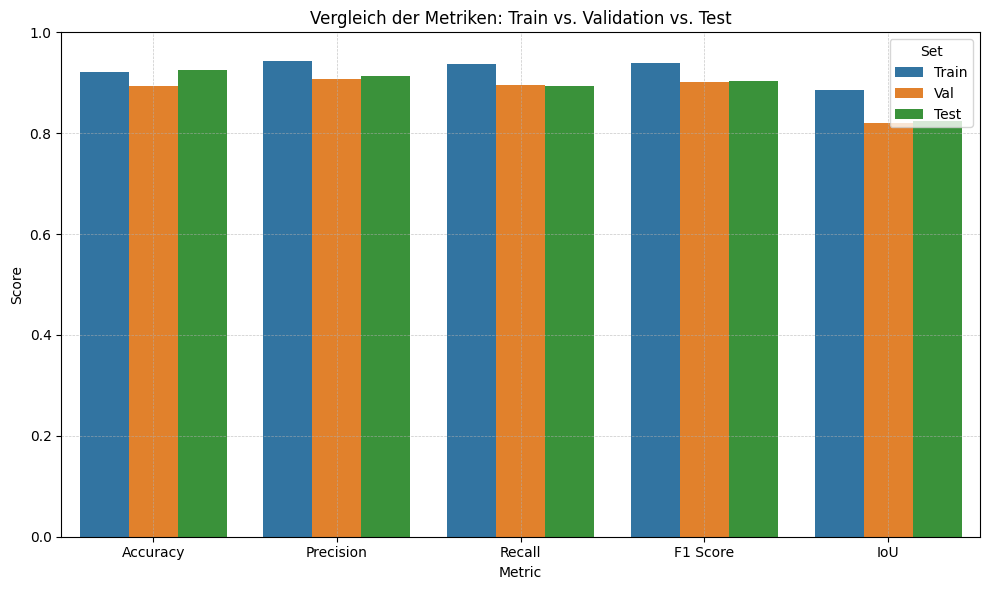

In [66]:
import import_ipynb
from utils.metrics_barplot import draw_metrics_barplot

draw_metrics_barplot(metrics_summary_results, save_title=f"{notebook_title}_batch_size_{BATCH_SIZE}")

# Visualize predictions

In [52]:
import import_ipynb
from utils.iou import iou_metric

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


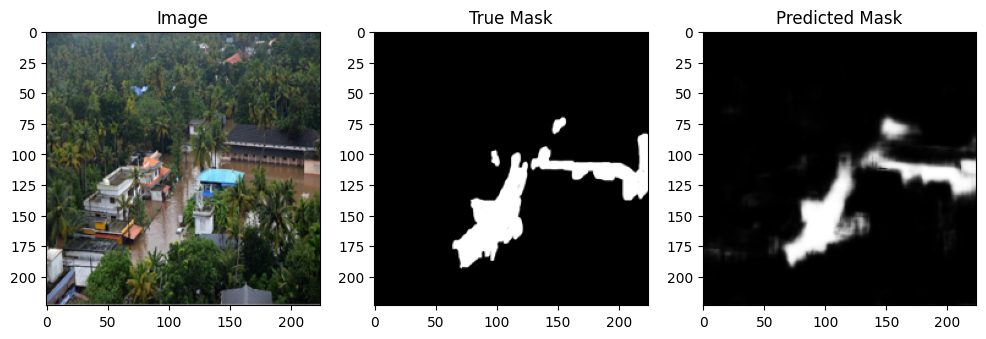

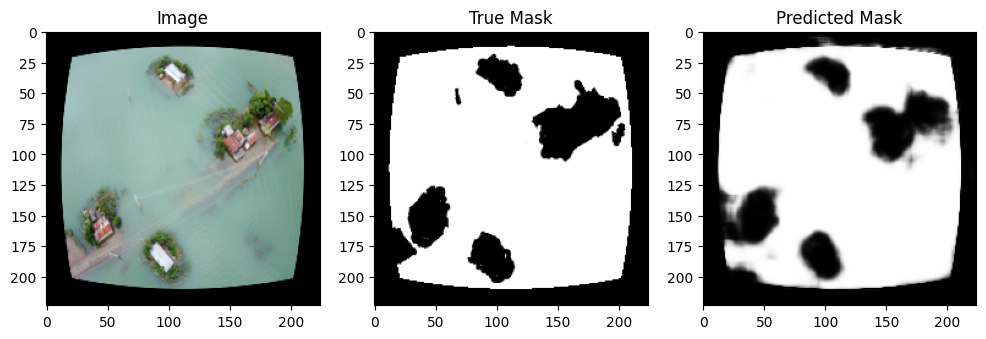

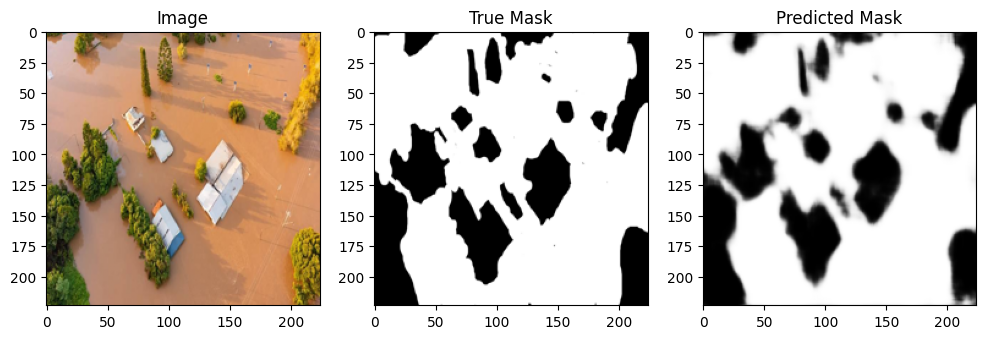

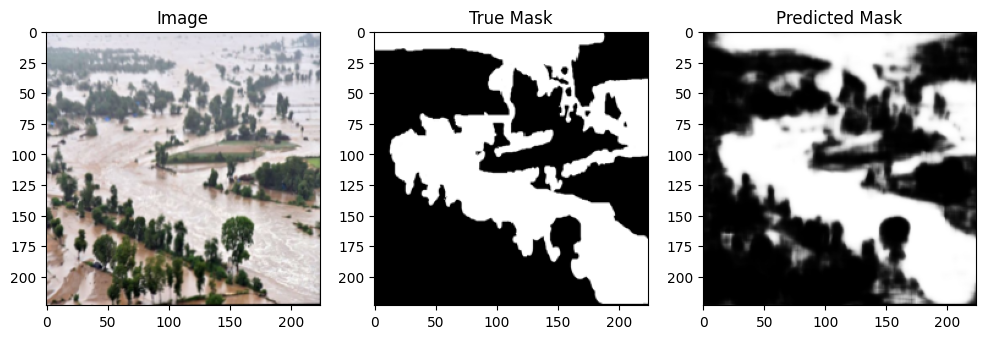

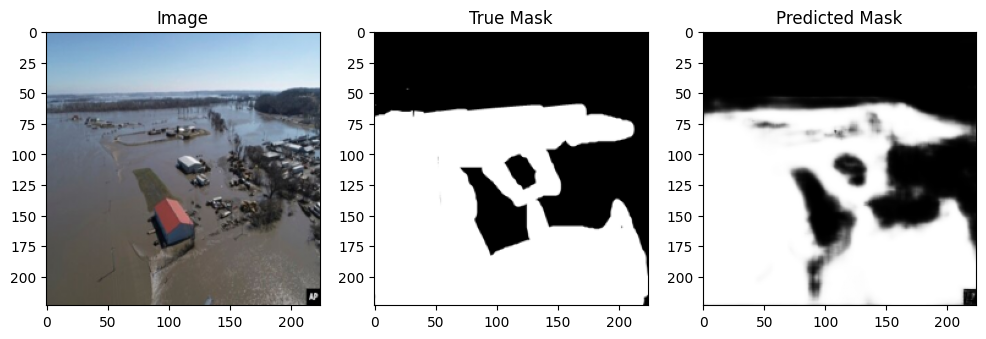

In [67]:
from tensorflow.keras.models import load_model

model = load_model(f'./trained_models/{notebook_title}_batch_size_{BATCH_SIZE}.keras')

def visualize_predictions(num_images=5):
    preds = model.predict(X_val[:num_images])

    for i in range(num_images):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title("Image")
        plt.imshow(X_val[i])

        plt.subplot(1, 3, 2)
        plt.title("True Mask")
        plt.imshow(y_val[i].squeeze(), cmap='gray')

        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow(preds[i].squeeze(), cmap='gray')

        plt.show()

visualize_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


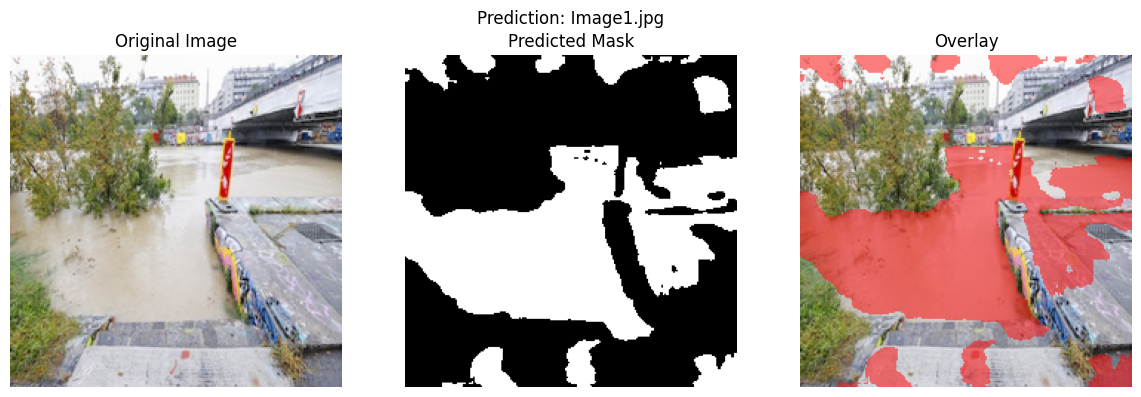

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


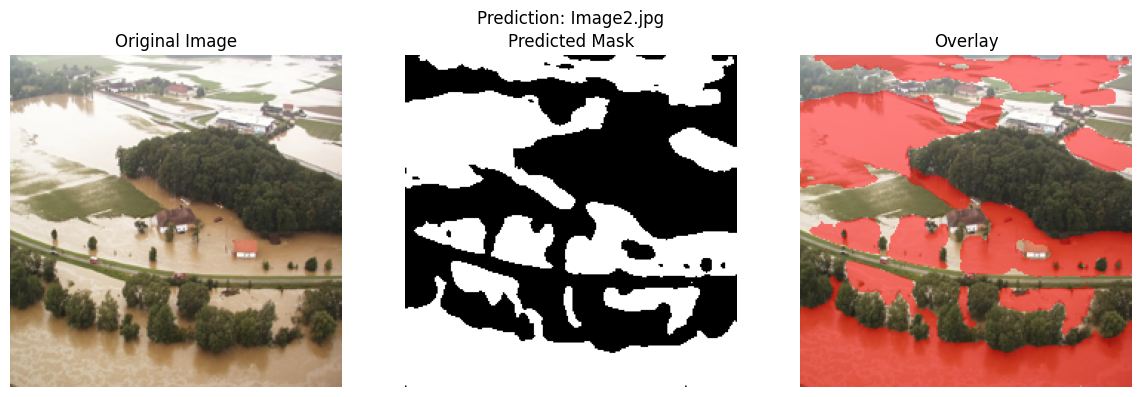

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


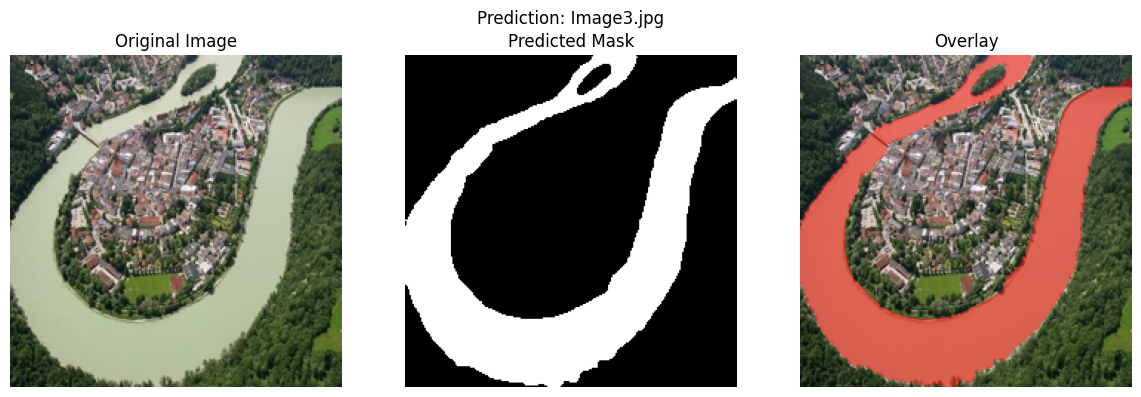

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


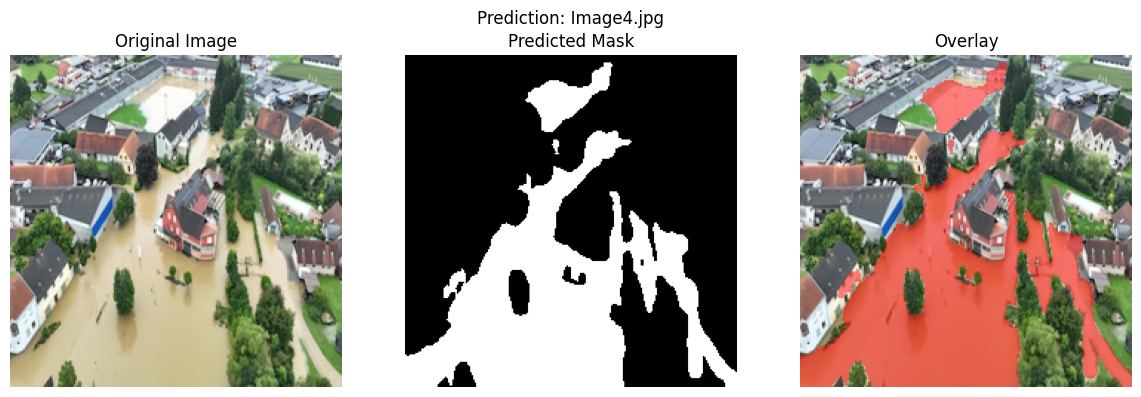

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


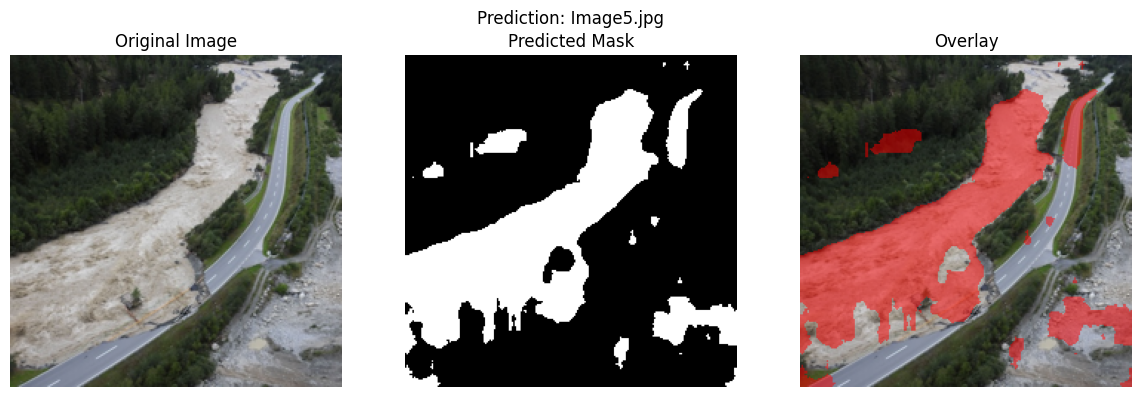

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


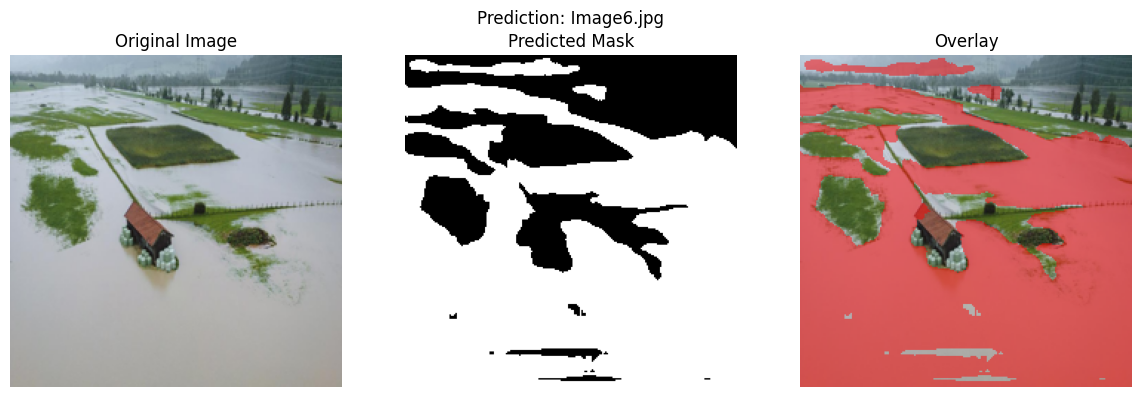

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


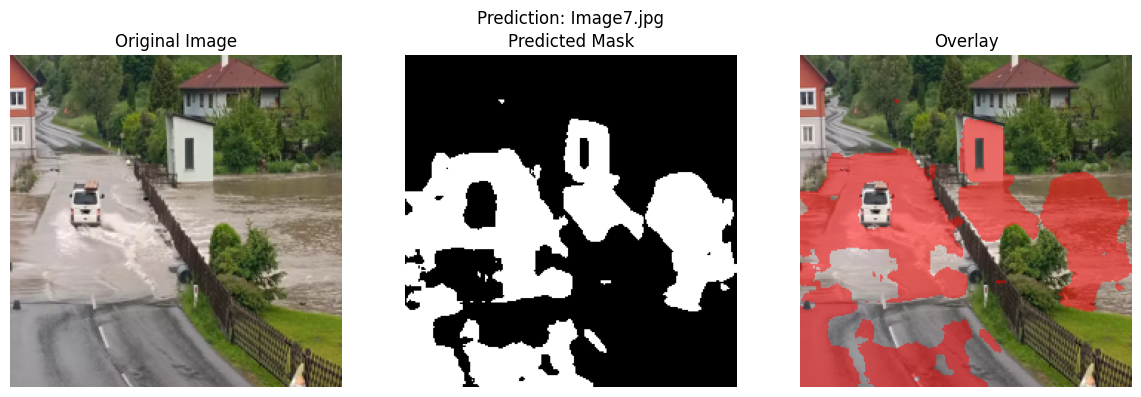

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


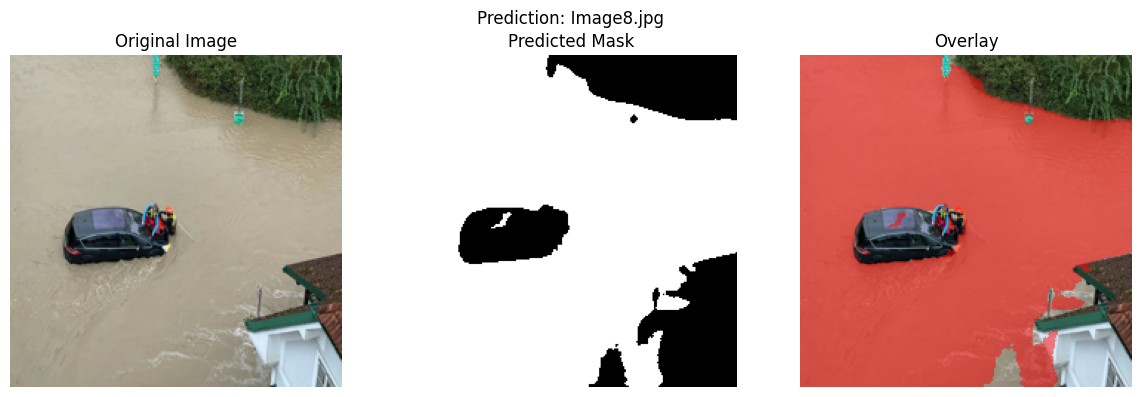

In [68]:
import import_ipynb
from utils.visualize_prediction import visualize_prediction
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

IMG_HEIGHT, IMG_WIDTH = 224, 224
IMAGE_FOLDER = 'flood_images'  
ALPHA = 0.5  # Transparency of the mask

# load the model
model = load_model(f'./trained_models/{notebook_title}_batch_size_{BATCH_SIZE}.keras', compile=False)

# use images for predictions
image_files = sorted(os.listdir(IMAGE_FOLDER))
for img_file in image_files:
    img_path = os.path.join(IMAGE_FOLDER, img_file)
    
    # preparation
    image = Image.open(img_path).convert("RGB")
    image_resized = image.resize((IMG_WIDTH, IMG_HEIGHT))
    image_array = np.array(image_resized) / 255.0
    input_tensor = np.expand_dims(image_array, axis=0)  # Shape: (1, H, W, 3)

    # prediction
    pred_mask = model.predict(input_tensor)[0, :, :, 0]  # Shape: (H, W)
    pred_binary = (pred_mask > 0.5).astype(np.uint8)

    visualize_prediction(
    image_resized=np.array(image_resized), 
    pred_binary=pred_binary, 
    img_file=img_file,
    alpha=ALPHA,
    is_saved=True,
    save_title=f'{notebook_title}_batch_size_{BATCH_SIZE}'
)